# Solvers

SymPy supports solving many types of equations, including algebraic equations, systems of equations, ordinary differential equations (ODEs), Diophantine equations, and inequalities. This guide will only go over the most common of these. To learn more, see the [solving guide in our documentation](https://docs.sympy.org/latest/guides/solving/index.html).

Note, by "solving", we specifically mean finding an expression or set of expressions that make some equation or system of equations true. "Solve" may colloquially mean other things, like "solve an integral", but SymPy does not use "solve" in this manner. We would rather say "evaluate an integral". 

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing()

## Solving Algebraic Equations

The most basic type of equation that SymPy can solve is an algebraic equation, like $$x^2 = y.$$

First, to represent the equation, use the `Eq` object.

In [2]:
equation = Eq(x**2, y)
equation

Remember that `==` does a test if two expressions are exactly equal. It always returns either `True` or `False`. So you cannot use it for representing an equation.

In [3]:
x**2 == y

False

To solve the equation, use the `solve()` function, like

```
solve(equation, variable)
```

In [4]:
sol = solve(equation, x)
sol

The result is a list of solutions. We can access individual solutions using the usual indexing methods.

In [5]:
sol[0]

In [6]:
sol[1]

We can plug the solutions back into the equation to verify that they are correct.

In [7]:
equation.subs(x, sol[0])

The left side and right side of the result are the same, so the equation simplified to `True`.

Instead of using `Eq`, you can also just subtract one side of the equation from the other, and pass an expression that equals $0$ to `solve()`.

In [8]:
solve(x**2 - y, x)

Using expressions that equal 0 is often easier than using Eq, because they are easier to manipulate and easier to type. However, both methods are equivalent.

### Exercises

Solve the following equations

## Important Notes about `solve`

There are a few important things to be aware of when using `solve`.

1. Like other parts of SymPy, `solve` is designed to find **symbolic** solutions. We will discuss numerical solutions in a bit. This often means that `solve` is overkill if you are only interested in a numerical answer. For example:

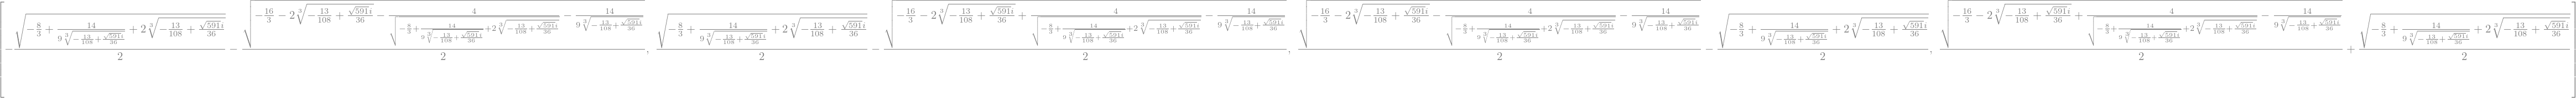

In [9]:
sols = solve(x**4 + 4*x**2 - 2*x + 1, x)
sols

Solve has used the general quartic equation to give all four solutions. This equation is inherently complicated. We can evaluate these numbers numerically with `evalf`:

In [10]:
for i in sols:
    print(i.evalf())

-0.264316247972295 + 1.99036087692341*I
0.264316247972295 + 0.422125262803572*I
-0.264316247972295 - 1.99036087692341*I
0.264316247972295 - 0.422125262803572*I


Again, though, if all we care about is a number, it's much simpler to just solve the equation numerically in the first place.

2. `solve()` may not return every possible solution to an equation. If `solve()` returns an empty list, it may just mean that there were no algorithms to find the solutions to the given equation. It may also raise `NotImplementedError` in this case. Because `solve` only returns symbolic solutions, it is possible to have equations that have a numerical solution, but which cannot be represented in closed-form.

In [11]:
solve(cos(x) - x, x)

NotImplementedError: multiple generators [x, cos(x)]
No algorithms are implemented to solve equation -x + cos(x)

We can verify with a plot that this equation does have a solution.

In [ ]:
%matplotlib inline

In [ ]:
plot(cos(x) - x)

Another way this can happen is with equations with infinitely many solutions.

In [ ]:
solve(sin(x) - 1, x)

The `solveset` function can represent infinite solution sets. However, for most use-cases, `solve` is preferred because its output format is easier to work with (a list or dictionary rather than a SymPy `Set`).

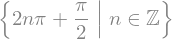

In [12]:
solveset(sin(x) - 1, x)

### Exercises

Solve the following equations.

$$x^2 + 2x - 4 = 0$$
$$\tan(x) = \sin(x)$$
$$x^3 + yx^2 = 2$$

(solve this last equation for both $x$ and $y$)

## Numerical Solutions

In most cases, if you want a numerical solution, you are best off using a numerical library like SciPy's [`fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve) (we will discuss this in depth in the [code generation section](07-Code-Generation.ipynb). 

However, SymPy can also be used for this. An advantage of using SymPy is that it supports arbitrary precision floating-point numbers, so you can find solutions with any specified degree of precision.

To solve an equation numerically in SymPy, use the `nsolve` function. 

```
nsolve(equation, starting_point)
```

`nsolve` takes a point which should be near the solution you are trying to find.

In [13]:
nsolve(cos(x) - x, 1)

### Exercises

Solve the equations from above numerically, using `nsolve`.

$$x^2 + 2x - 4 = 0$$
$$\tan(x) = \sin(x)$$

Remember that these equations have multiple solutions, so you may need to use multiple different starting points to find them all.

## Systems of Equations

`solve()` also supports solving systems of equations.  To solve a system, use

```
solve(list_of_equations, list_of_variables, dict=True)
```

The `dict=True` flag is recommended, as this will make `solve` return the results as a list of dictionaries, which map variables to solutions. Without this flag, the output of `solve` may be more difficult to use programatically. 

Let's solve the linear system

$$\begin{eqnarray}
x + y & = & 2z\\
y  & = & -4z
\end{eqnarray}$$

for $x$ and $y$ (treating $z$ as a constant).

In [14]:
equations = [Eq(x + y, 2*z), Eq(y, -4*z)]

In [15]:
sols = solve(equations, [x, y], dict=True)
sols

Note that any variable in the equations that we don't explicitly specify as a variable we want to solve for is treated as a constant (in this case, $z$).

We can access the solutions by iterating the dicts in the list (in this case, there is just one), and accessing the solution by each variable in the dict.

In [16]:
for solution in sols:
    print("x =", solution[x])
    print("y =", solution[y])

x = 6*z
y = -4*z


One benefit of the dict representation is we can pass it directly to `subs` to plug the solution into the equation (or into another equation).

In [17]:
for solution in sols:
    for equation in equations:
        print(equation.subs(solution))

True
True


Note that SymPy is primarily able to solve systems of equations that are either *linear* or *polynomial* in the variables being solved for. Most non-linear equations do not even have a closed-form solution, and remember that `solve()` *only* tries to find closed-form, symbolic solutions.

In [18]:
equations = [cos(x) - sin(y), cos(x)*y - 1]

In [19]:
solve(equations, [x, y])

NotImplementedError: could not solve -sin(1/cos(x)) + cos(x)

`nsolve` can solve systems of equations numerically, so if this is all you need, this is still the preferred method. 

To solve a system with `nsolve`, pass the variables to be solved for and a list of starting points.

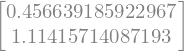

In [20]:
nsolve(equations, [x, y], [1, 1])

## Exercises

Solve the following system of equations. 

$$
\begin{eqnarray}
x^{2} - x y &=& 1\\
x + y & = & 0
\end{eqnarray}
$$
Then substitute the system into the original equations to verify they are correct.